In [1]:
!pip install biopython
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO
from Bio import SeqIO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.7 MB/s eta 0:00:00


In [2]:
from Bio import Entrez, SeqIO


with open('IDS.txt', "r") as file:
    sequence_ids = [line.strip() for line in file.readlines()]
db = "nucleotide"
sequences = []

for seq_id in sequence_ids:
    with Entrez.efetch(db=db, id=seq_id, rettype="fasta", retmode="text") as handle:
        sequence = handle.read()
        sequences.append(sequence)
    with open('sequences.fasta', 'w') as output_file:
        output_file.writelines(sequences)


/usr/local/lib/python3.10/dist-packages/Bio/Entrez/__init__.py:734: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


In [3]:
output_file = "sequences.fasta"
with open(output_file, "r") as fasta_file:
    print("Lines:", fasta_file.readlines())

Lines: ['>NM_001200.4 Homo sapiens bone morphogenetic protein 2 (BMP2), mRNA\n', 'GCCGCCGCCGCCGTCGCCGCCGCCGGAGTCCTCGCCCCGCCGCGCTGCGCCCGGCTCGCGCTGCGCTAGT\n', 'CGCTCCGCTTCCCACACCCCGCCGGGGACTGGCAGCCGCCGCCGCACATCTGCCGCCACAGCCTCCGCCG\n', 'GCTACCCGAACGTTCTCGGGGCCAGCGCCGAGTGGATCACCGGGGACCGCGAGGCACCCGCGCGCCGCAG\n', 'ACCCCGCGCGGGCTGGAGCACCCGGCAGAGCGCGCCACAGCGCCGTGGCCTCTGCTGCCCGGGCTGCGCC\n', 'AGAGCCGCGGACGGGCGCGCAGAGCGCCGGGGACTCCGGAGCCGATCCCTAGCGCCGCGATGCGGAGCAC\n', 'CTACTGCAGGAGATCGGGGGCCTGGGACGCGCTGGCCGAGGTGTGATCGGACCCCAGGCTAGCCACAAAG\n', 'GGCACTTGGCCCCAGGGCTAGGAGAGCGAGGGGAGAGCACAGCCACCCGCCTCGGCGGCCCGGGACTCGG\n', 'CTCGACTCGCCGGAGAATGCGCCCGAGGACGACGGGGCGCCAGAGCCGCGGTGCTTTCAACTGGCGAGCG\n', 'CGAATGGGGGTGCACTGGAGTAAGGCAGAGTGATGCGGGGGGGCAACTCGCCTGGCACCGAGATCGCCGC\n', 'CGTGCCCTTCCCTGGACCCGGCGTCGCCCAGGATGGCTGCCCCGAGCCATGGGCCGCGGCGGAGCTAGCG\n', 'CGGAGCGCCCGACCCTCGACCCCCGAGTCCCGGAGCCGGCCCCGCGCGGGGCCACGCGTCCCTCGGGCGC\n', 'TGGTTCCTAAGGAGGACGACAGCACCAGCTTCTCCTTTCTCCCTTCCCTTCCCTGCCCCGCACTCCTCCC\n', 'CCTGCT

In [4]:
!apt-get install -y clustalo
!clustalo --help



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 1s (188 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .../clustalo_1.2.4-7_amd64.deb ...
Unpacking clustalo (1.2.4-7) ...
Setting up

In [13]:
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO


input_file = "sequences.fasta"                # File with downloaded sequences
aligned_file = "aligned_sequences.fasta"      # File to save aligned sequences

# Align sequences using Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(
    infile=input_file, outfile=aligned_file, verbose=True, auto=True, force=True
)
stdout, stderr = clustalomega_cline()
alignment = AlignIO.read(aligned_file, "fasta")



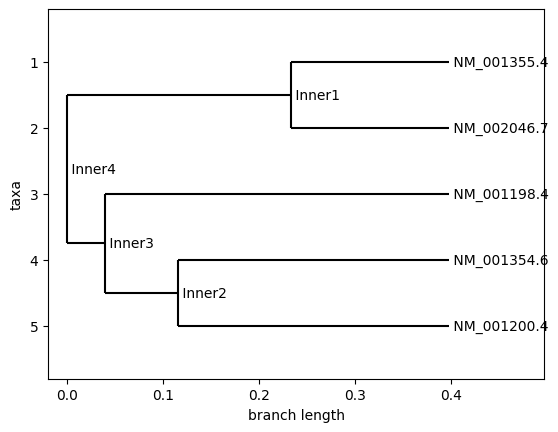

In [14]:

from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
aligned_file = "aligned_sequences.fasta"
alignment = AlignIO.read(aligned_file, "fasta")
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

Phylo.draw(tree)